In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("data1.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [3]:
# Highly Imbalanced Data
data['Class'].value_counts()

0.0      284315
1.0         492
492.0         1
Name: Class, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284810 entries, 0 to 284809
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [5]:
data = data.dropna()

In [6]:
n = len(data)
train_data = data.iloc[:int(n * 0.8),:]
test_data = data.iloc[int(n * 0.8):,:]

In [7]:
print(len(train_data), len(test_data))

227845 56962


In [8]:
x_train = train_data.iloc[:, :28].values
y_train = train_data.iloc[:, 28].values

x_test = test_data.iloc[:, :28].values
y_test = test_data.iloc[:, 28].values

x_test_0 = test_data[test_data['Class'] == 0].iloc[:, :28].values
x_test_1 = test_data[test_data['Class'] == 1].iloc[:, :28].values

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(227845, 28) (227845,) (56962, 28) (56962,)


## Simple Autoencoder 

In [9]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [10]:
input_dim = x_train.shape[1]
encoding_dim = 2

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()


Compression factor: 14.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 58        
                                                                 
 dense_1 (Dense)             (None, 28)                84        
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


In [11]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 2)                 58        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
891/891 [==============================] - 3s 2ms/step - loss: 0.0760 - val_loss: -0.3199
Epoch 2/50
891/891 [==============================] - 2s 2ms/step - loss: -1.6529 - val_loss: -1.7986
Epoch 3/50
891/891 [==============================] - 2s 2ms/step - loss: -4.6178 - val_loss: -4.0925
Epoch 4/50
891/891 [==============================] - 2s 2ms/step - loss: -8.8155 - val_loss: -7.1083
Epoch 5/50
891/891 [==============================] - 2s 2ms/step - loss: -13.9271 - val_loss: -10.6478
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: -19.9041 - val_loss: -14.8155
Epoch 7/50
891/891 [==============================] - 2s 2ms/step - loss: -26.8732 - val_loss: -19.5691
Epoch 8/50
891/891 [==============================] - 2s 2ms/step - loss: -34.6923 - val_loss: -24.8403
Epoch 9/50
891/891 [==============================] - 2s 2ms/step - loss: -43.3898 - val_loss: -30.7581
Epoch 10/50
891/891 [==============================] - 2s 2ms/step - loss

In [13]:
decoded_imgs = autoencoder.predict(x_test)

In [14]:
loss = []
n = len(decoded_imgs)
for i in range(n):
        mse = np.mean((x_test[i] - decoded_imgs[i])**2 )
        if mse :
            loss.append(mse)

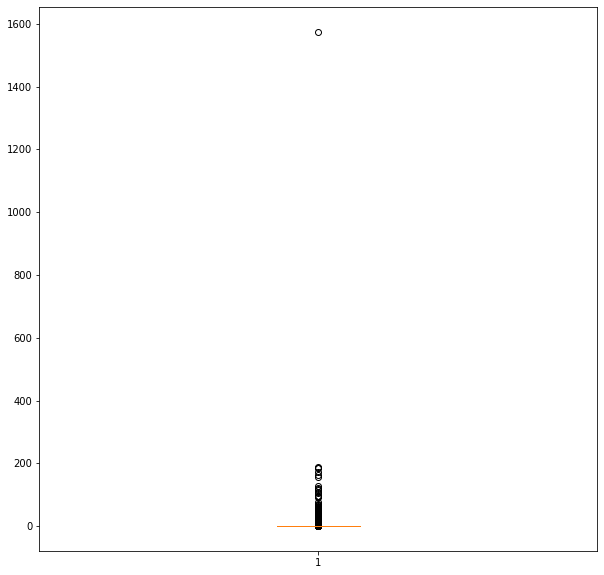

In [15]:
loss.sort()
fig, ax = plt.subplots(figsize =(10, 10))
ax.boxplot(loss)
 
plt.show()

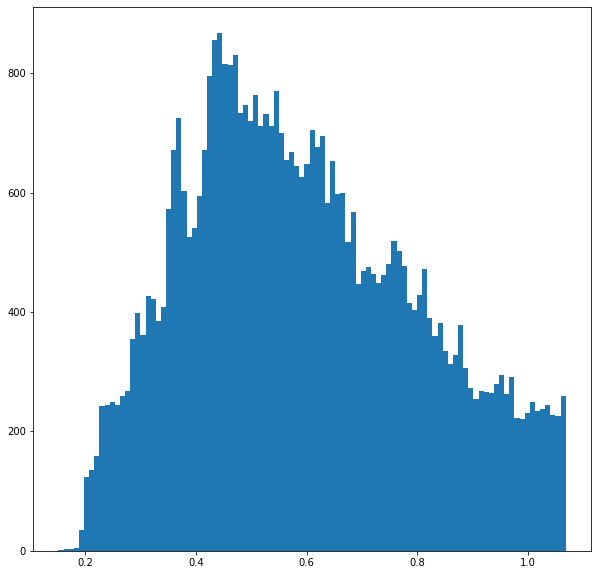

In [16]:
# Histogram with bins upto the mean. The loss is skewed.
fig, ax = plt.subplots(figsize =(10, 10))
ax.hist(loss, bins = np.linspace(np.min(loss), np.mean(loss), num = 100))
 
plt.show()

In [17]:
encoded_imgs_1 = encoder.predict(x_test_1)
encoded_imgs_0 = encoder.predict(x_test_0)

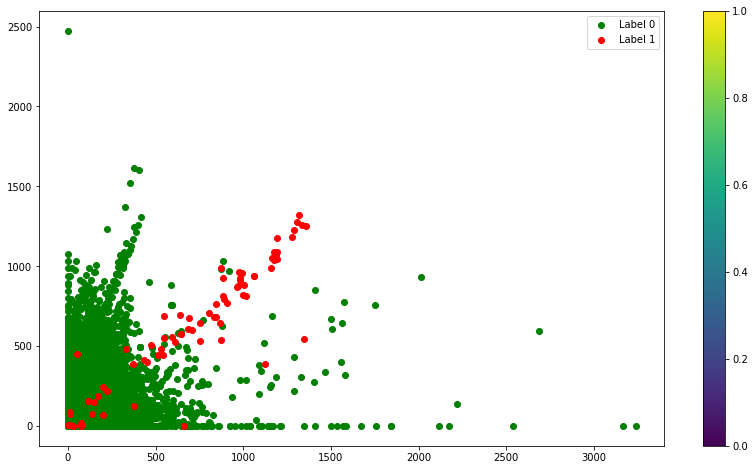

In [18]:
plt.figure(figsize=(14, 8))
plt.scatter(encoded_imgs_0 [:, 0], encoded_imgs_0 [:, 1],color= 'green')
plt.scatter(encoded_imgs_1 [:, 0], encoded_imgs_1 [:, 1],color= 'red')

plt.colorbar()
plt.legend(["Label 0", "Label 1"], loc=0, frameon=True)
plt.show()

In [19]:
print("MEAN MSE: {}".format(np.mean(loss)))

MEAN MSE: 1.0685130309622846


## Autoencoder with 3 layers

In [20]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 232       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 28)                252       
                                                                 
Total params: 582
Trainable params: 582
Non-trainable 

In [21]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 232       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 278
Trainable params: 278
Non-trainable params: 0
_________________________________________________________________


In [22]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1=autoencoder.layers[-3]
decoder_layer2=autoencoder.layers[-2]
decoder_layer3=autoencoder.layers[-1]
decoder=Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 28)                252       
                                                                 
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [23]:
def decoder(encoded_input):
    h=Dense(inter_encoding_dim, activation='relu')(encoded_input)
    decoded= Dense(input_dim, activation='sigmoid')(h)
    return decoded

In [24]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
891/891 [==============================] - 6s 6ms/step - loss: -1267.5728 - val_loss: -6398.5161
Epoch 2/50
891/891 [==============================] - 4s 5ms/step - loss: -143313.3750 - val_loss: -332905.9688
Epoch 3/50
891/891 [==============================] - 5s 5ms/step - loss: -1745866.2500 - val_loss: -2735955.2500
Epoch 4/50
891/891 [==============================] - 4s 4ms/step - loss: -8589118.0000 - val_loss: -10680930.0000
Epoch 5/50
891/891 [==============================] - 2s 3ms/step - loss: -27546462.0000 - val_loss: -30459940.0000
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: -68402976.0000 - val_loss: -69501256.0000
Epoch 7/50
891/891 [==============================] - 2s 3ms/step - loss: -143264208.0000 - val_loss: -136911168.0000
Epoch 8/50
891/891 [==============================] - 2s 3ms/step - loss: -268679616.0000 - val_loss: -248021664.0000
Epoch 9/50
891/891 [==============================] - 2s 2ms/step - loss: -46715228

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
loss = []
n = len(decoded_imgs)
for i in range(n):
        mse = np.mean((x_test[i] - decoded_imgs[i])**2 )
        if mse :
            loss.append(mse)

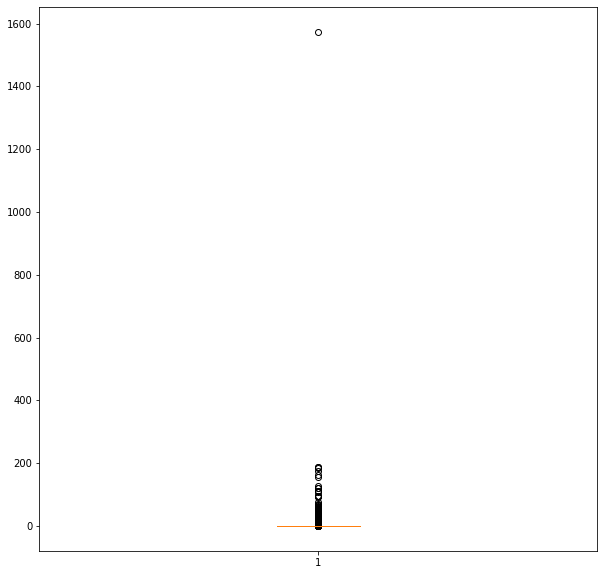

In [ ]:
loss.sort()
fig, ax = plt.subplots(figsize =(10, 10))
ax.boxplot(loss)
 
plt.show()

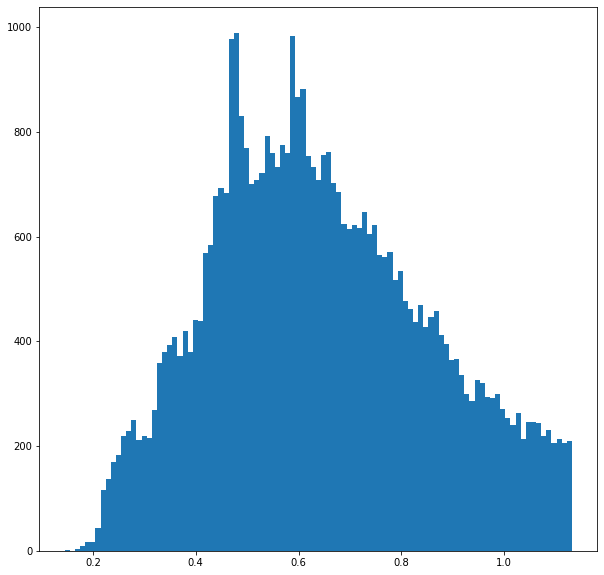

In [ ]:
# Histogram with bins upto the mean. The loss is skewed.
fig, ax = plt.subplots(figsize =(10, 10))
ax.hist(loss, bins = np.linspace(np.min(loss), np.mean(loss), num = 100))
 
plt.show()

In [ ]:
encoded_imgs_1 = encoder.predict(x_test_1)
encoded_imgs_0 = encoder.predict(x_test_0)

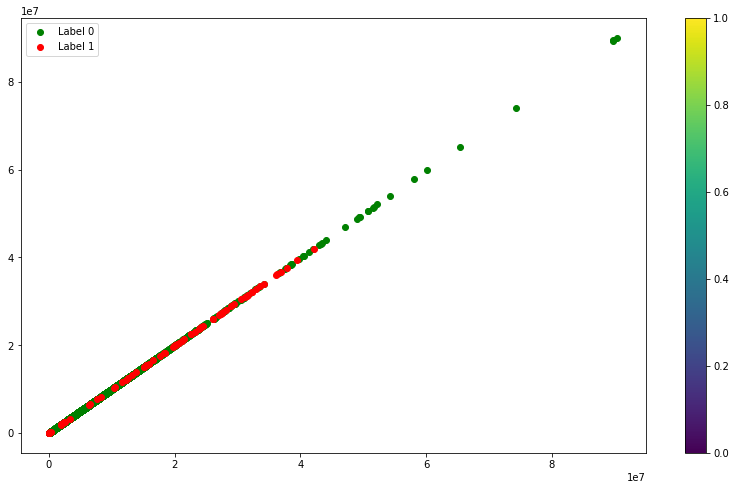

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(encoded_imgs_0 [:, 0], encoded_imgs_0 [:, 1],color= 'green')
plt.scatter(encoded_imgs_1 [:, 0], encoded_imgs_1 [:, 1],color= 'red')

plt.colorbar()
plt.legend(["Label 0", "Label 1"], loc=0, frameon=True)
plt.show()

In [ ]:
print("MEAN MSE: {}".format(np.mean(loss)))

MEAN MSE: 1.1318417142588495


### The MSE of the Simple Autoencoder is less than that of the Deep Autoencoder. Since the data is not too complex, the deep Autoencoder is overfitting. We can also see from the scatterplots that the Simple AE is able to form clusters better than that of Deep AE.